In [1]:
import numpy as np
import pandas as pd
import utils
from scipy import signal 
import matplotlib.pyplot as plt
import os

Accelerometer format: Time (s), X (m/s^2), Y (m/s^2), Z (m/s^2) \
Gyroscope format: Time (s), X (rad/s), Y (rad/s), Z (rad/s)

In [16]:
# load csv data as pandas dataframe

filename_acc = 'data/karlebach/Accelerometer.csv'
filename_gyro = 'data/karlebach/Gyroscope.csv'
filename = os.path.basename(os.path.dirname(filename_acc))

acc_df = pd.read_csv(filename_acc, sep=',',header=0)
gyro_df = pd.read_csv(filename_gyro, sep=',',header=0)
gyro_df

,Time (s),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s)
0,0.015821,-0.083075,-0.106593,0.120795
1,0.018303,-0.083075,-0.106593,0.120795
2,0.020786,-0.083075,-0.106593,0.120795
3,0.023235,-0.083075,-0.106593,0.120795
4,0.025670,-0.083075,-0.106593,0.120795
...,...,...,...,...
125790,306.391221,0.722021,0.368646,-0.061237
125791,306.393657,0.701253,0.358873,-0.052686
125792,306.396091,0.673154,0.351543,-0.045355
125793,306.398527,0.640168,0.340547,-0.036804


In [18]:
# dataframe to numpy array

if filename == "karlebach":
    acc = np.asarray([
        acc_df['Time (s)'].to_numpy(dtype=float),
        acc_df['Acceleration x (m/s^2)'].to_numpy(dtype=float), 
        acc_df['Acceleration y (m/s^2)'].to_numpy(dtype=float), 
        acc_df['Acceleration z (m/s^2)'].to_numpy(dtype=float)
    ])
    gyro = np.asarray([
        gyro_df['Time (s)'].to_numpy(dtype=float),
        gyro_df['Gyroscope x (rad/s)'].to_numpy(dtype=float), 
        gyro_df['Gyroscope y (rad/s)'].to_numpy(dtype=float), 
        gyro_df['Gyroscope z (rad/s)'].to_numpy(dtype=float)
    ])
else:
    acc = np.asarray([
        acc_df['Time (s)'].to_numpy(dtype=float),
        acc_df['X (m/s^2)'].to_numpy(dtype=float), 
        acc_df['Y (m/s^2)'].to_numpy(dtype=float), 
        acc_df['Z (m/s^2)'].to_numpy(dtype=float)
    ])
    gyro = np.asarray([
        gyro_df['Time (s)'].to_numpy(dtype=float),
        gyro_df['X (rad/s)'].to_numpy(dtype=float), 
        gyro_df['Y (rad/s)'].to_numpy(dtype=float), 
        gyro_df['Z (rad/s)'].to_numpy(dtype=float)
    ])

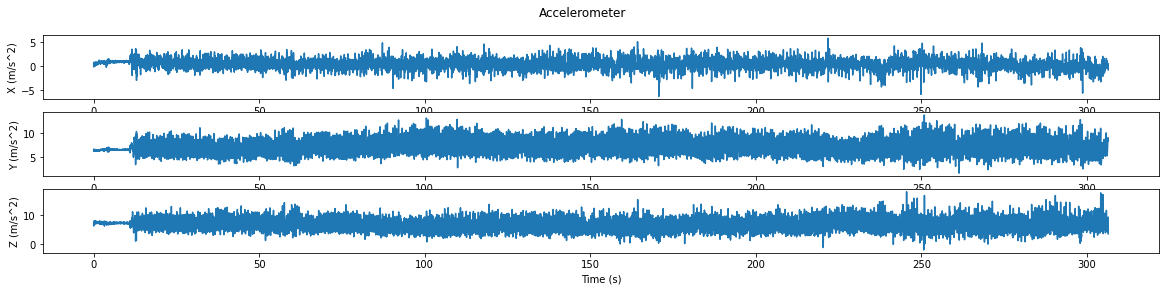

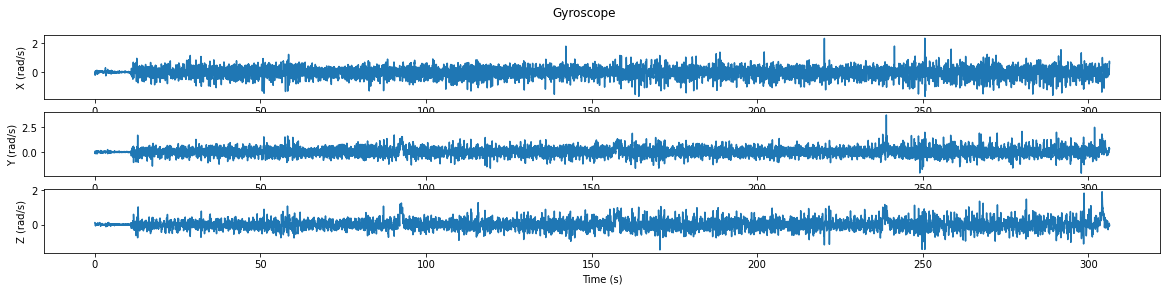

In [19]:
# plot data from accelerator and gyroscope
utils.plot_acc(acc, 'all')
utils.plot_gyro(gyro, 'all')

In [20]:
# norm of accelerometer & gyroscope

acc_norm = np.linalg.norm(acc[1::], axis=0)
acc_norm = np.array([acc[0], acc_norm])
gyro_norm = np.linalg.norm(gyro[1::], axis=0)
gyro_norm = np.array([gyro[0], gyro_norm])


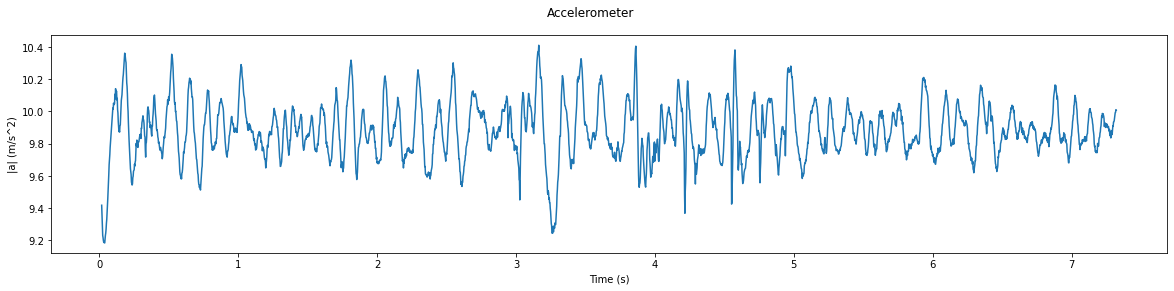

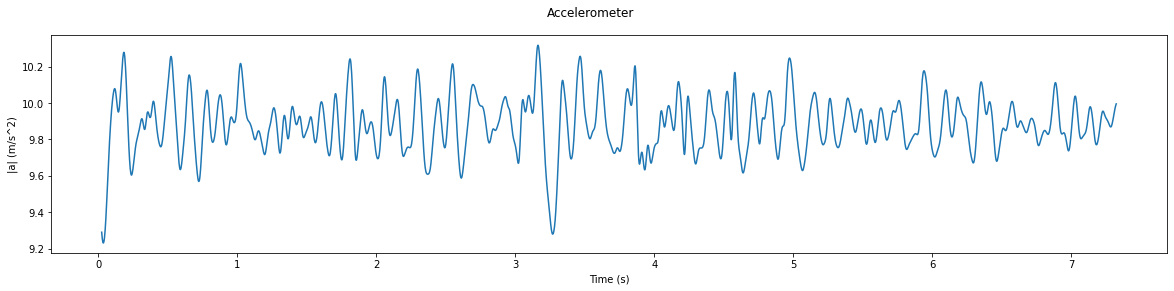

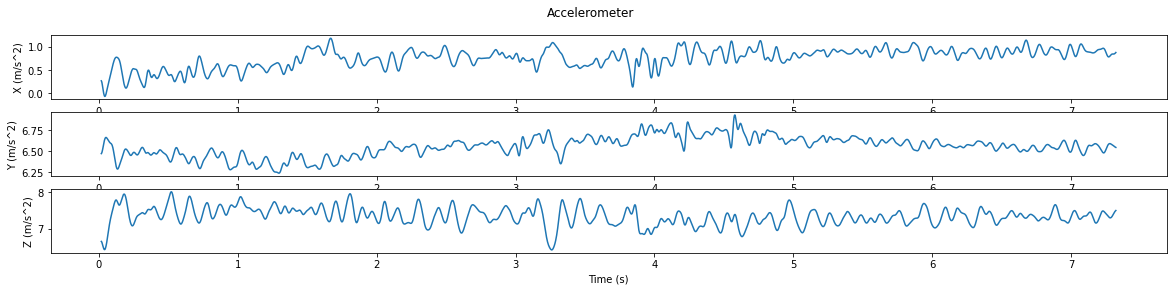

In [21]:
# filter signals with weighed moving average filter

filtered_acc = utils.weighted_moving_average(acc_norm, dim=1, wl=21)
filtered_gyro = utils.weighted_moving_average(gyro_norm, dim=1, wl=21)

filtered_acc_all = np.concatenate([np.expand_dims(acc[0], 0), utils.weighted_moving_average(acc[1::], dim=1, wl=21)],  axis=0)
filtered_gyro_all = np.concatenate([np.expand_dims(gyro[0], 0), utils.weighted_moving_average(gyro[1::], dim=1, wl=21)],  axis=0)

# plot original and filtered data from accelerator 
utils.plot_acc(acc_norm[0:3000, 0:3000], type='norm')
utils.plot_acc(filtered_acc[0:3000, 0:3000], type='norm')
utils.plot_acc(filtered_acc_all[0:3000, 0:3000], type='all')


In [23]:
# save to folder

np.save("preprocessed_data/" + filename + "_acc.npy", filtered_acc)
np.save("preprocessed_data/" + filename + "_gyro.npy", filtered_gyro)

np.save("preprocessed_data/" + filename + "_acc_all.npy", filtered_acc_all)
np.save("preprocessed_data/" + filename + "_gyro_all.npy", filtered_gyro_all)